In [1]:
!pip install numpy pandas matplotlib tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

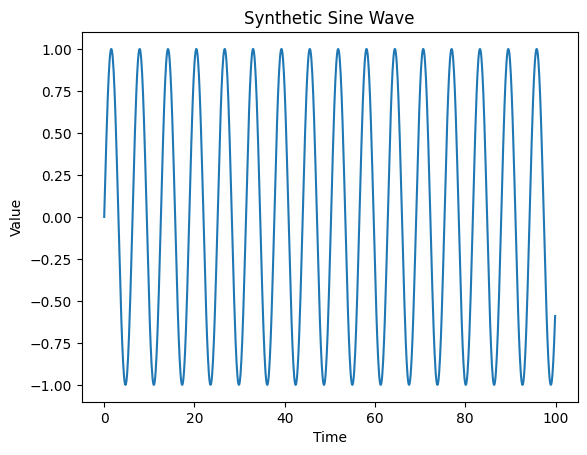

In [3]:
# Create time steps
time = np.arange(0, 100, 0.1)
# Create sine wave data
data = np.sin(time)

# Plot the data
plt.plot(time, data)
plt.title("Synthetic Sine Wave")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [4]:
def create_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

# Set window size
window_size = 20

# Prepare data
X, y = create_dataset(data, window_size)

# Reshape for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [5]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3819
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1192
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0109
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.4057e-04
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5945e-04
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1934e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.8496e-05
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8780e-05
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9211e-05


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


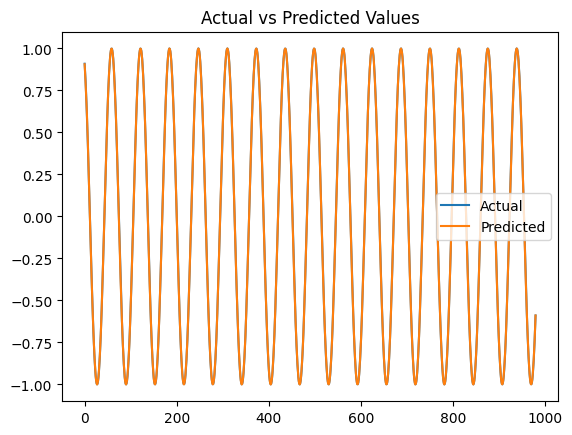

In [7]:
predictions = model.predict(X)

# Plot actual vs predicted
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()